# Meetup YOSS#

## Exploration des services cognitifs ##

Dans ce notebook, on fait une suite d'opérations pour tester les services cognitifs, leurs limites, et leurs potentiel, avec une succession d'exemples utiles ou ludiques.

## Exemple 1 : Hello world##


In [59]:
from mstranslator import Translator

In [64]:

translator = Translator("8dc97e03193b4674b160cfe2b07c8223")
print(translator.translate("Coucou je suis là", lang_from='fr', lang_to='de'))
print(translator.translate("Ich bin hier", lang_from='de', lang_to='fr'))

Ich bin hier
Je suis là


## Exemple 2 : Téléphone Arabe ##

Le principe est simple : on prend une phrase, on la traduit dans une langue a, puis de la langue a vers b, puis de b vers c.... 

Et on regarde quand ça casse :)

In [4]:
languages={"af":"Afrikaans","ar":"Arabic","bs-Latn":"Bosnian (Latin)","bg":"Bulgarian","ca":"Catalan","zh-CHS":"Chinese Simplified","zh-CHT":"Chinese Traditional","hr":"Croatian","cs":"Czech","da":"Danish","nl":"Dutch","en":"English","et":"Estonian","fi":"Finnish","fr":"French","de":"German","el":"Greek","ht":"Haitian Creole","he":"Hebrew","hi":"Hindi","mww":"Hmong Daw","hu":"Hungarian","id":"Indonesian","it":"Italian","ja":"Japanese","sw":"Kiswahili","tlh":"Klingon","tlh-Qaak":"Klingon (pIqaD)","ko":"Korean","lv":"Latvian","lt":"Lithuanian","ms":"Malay","mt":"Maltese","no":"Norwegian","fa":"Persian","pl":"Polish","pt":"Portuguese","otq":"Querétaro Otomi","ro":"Romanian","ru":"Russian","sr-Cyrl":"Serbian (Cyrillic)","sr-Latn":"Serbian (Latin)","sk":"Slovak","sl":"Slovenian","es":"Spanish","sv":"Swedish","th":"Thai","tr":"Turkish","uk":"Ukrainian","ur":"Urdu","vi":"Vietnamese","cy":"Welsh","yua":"Yucatec Maya"}
some_languages={"en","fr","de","es","zh-CHS"}


In [67]:
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

print(similar("Coucou je suis là","je suis là"))

0.7407407407407407


In [5]:
sentence="Le ciel est rouge, beaucoup de sang a dû couler cette nuit"
#sentence = "O rage, O désespoir, O vieillesse ennemie. Que n'ai-je donc vécu que pour cette infamie? Et ne me suis-je blanchi dans des traveaux guerriers, que pour voir en un jour, flétrir tant de lauriers?"

In [68]:

lan="fr"
ecart=[]
sentence_backup=sentence

for language in languages.keys():
    sentence=translator.translate(sentence,lang_from=lan,lang_to=language)
    lan=language
    ecart.append(similar(translator.translate(sentence,lang_from=lan,lang_to="fr"),sentence_backup))
    print(translator.translate(sentence,lang_from=lan,lang_to="fr"))
  

Le ciel est rouge, et ce soir, il y a beaucoup de circulation sanguine.
Red Sky et ce soir, il y a beaucoup de circulation sanguine.
Red Sky et ce soir il y a beaucoup de circulation sanguine.
Red Sky ce soir, il y a beaucoup la circulation sanguine.
Red Sky ce soir, il y a beaucoup la circulation sanguine.
Il y a beaucoup de sang qui coule dans le ciel rouge ce soir.
Il y a beaucoup de sang qui coule dans le ciel rouge ce soir.
Il y a beaucoup de sang qui coule dans le ciel de rouge ce soir.
Il y a beaucoup de sang qui coule dans le ciel de rouge ce soir.
Il y a beaucoup de sang qui coule dans le ciel rouge le soir.
Il y a beaucoup de sang qui coule dans la soirée de Red Sky.
Il y a beaucoup de sang qui coule dans la soirée de Red Sky.
Il y a beaucoup de sang coule dans le rouge dans le ciel le soir.
Le soir, il y a beaucoup de sang qui coule dans le rouge dans le ciel.
Le soir, il y a beaucoup de sang qui coule dans le rouge dans le ciel.
Le soir, il y a un grand nombre de flux de sa

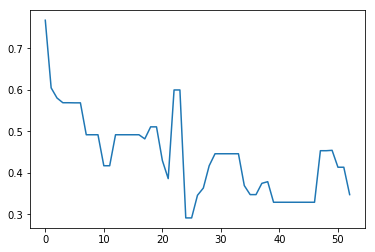

Ciel et la terre dans la nuit-200.


In [8]:
plt.plot(ecart)
plt.show()
print(translator.translate(sentence,lang_from=lan,lang_to="fr"))

langue de départ :  Le ciel est rouge, beaucoup de sang a dû couler cette nuit


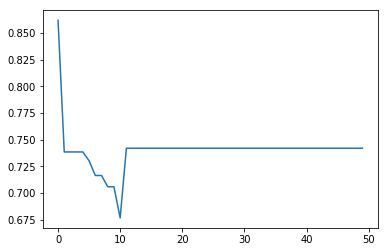

langue d'arrivée Le ciel est rouge et il y a beaucoup de sang qui coule de ce soir.


In [9]:
sentence=sentence_backup
print("langue de départ : ",sentence)
lan="fr"
ecart=[]
sentence_backup=sentence
for k in range(10):
    for language in some_languages:
        sentence=translator.translate(sentence,lang_from=lan,lang_to=language)
        lan=language
        ecart.append(similar(translator.translate(sentence,lang_from=lan,lang_to="fr"),sentence_backup))
plt.plot(ecart)
plt.show()
print("langue d'arrivée : ",translator.translate(sentence,lang_from=lan,lang_to="fr"))

## Exemple 3 : Analyse de films ##

Le principe : on prends les phrases d'un transcript de film, puis on les divise par personnage, et on regarde l'évolution du sentiment des phrases de chaque caractère pour regarder ce qui se passe

cf autre notebook

## Exemple 4 : Traduction de meme ##

On prend une image, on extrait le texte, on traduit le texte, et on colle la traduction :)

In [97]:
import numpy as np
def url_to_json(url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json    
    headers = {'Ocp-Apim-Subscription-Key': "260cf838ef754ef1a0ee51ea327727d0"}
    conn = http.client.HTTPSConnection('westeurope.api.cognitive.microsoft.com')
    conn.request("POST", "/vision/v2.0/ocr?%s" , "{'url':"+url+"}", headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    conn.close()
    return parsed

parsed=url_to_json("'https://img-9gag-fun.9cache.com/photo/avO3wGW_460s.jpg'")


In [98]:
print(parsed)

{'language': 'en', 'orientation': 'Up', 'textAngle': 0.0, 'regions': [{'boundingBox': '0,9,451,743', 'lines': [{'boundingBox': '388,9,63,7', 'words': [{'boundingBox': '388,9,63,7', 'text': 'TLIVER.COM'}]}, {'boundingBox': '27,298,407,23', 'words': [{'boundingBox': '27,298,29,16', 'text': 'THE'}, {'boundingBox': '61,298,61,23', 'text': 'BEAUTY'}, {'boundingBox': '127,298,81,16', 'text': 'INDUSTRY'}, {'boundingBox': '212,298,30,16', 'text': 'FOR'}, {'boundingBox': '247,298,38,16', 'text': 'MEN:'}, {'boundingBox': '289,298,38,16', 'text': 'THIS'}, {'boundingBox': '332,298,31,16', 'text': 'CAN'}, {'boundingBox': '369,298,19,16', 'text': 'BE'}, {'boundingBox': '393,298,41,16', 'text': 'USED'}]}, {'boundingBox': '41,323,314,18', 'words': [{'boundingBox': '41,323,20,16', 'text': 'AS'}, {'boundingBox': '66,323,84,18', 'text': 'SHAMPOO,'}, {'boundingBox': '202,323,53,18', 'text': 'WASH,'}, {'boundingBox': '260,323,38,17', 'text': 'FACE'}, {'boundingBox': '302,323,53,18', 'text': 'WASH,'}]}, {'b

In [99]:
lines=[k  for region in regions for k in region["lines"]]

In [100]:
translated=[]
for region in regions:
    print(region)
    lines=region["lines"]
    region_text=""
    
    for k in range(len(lines)):
        line=lines[k]
        for word in line["words"]:
            region_text+=" "+word["text"]
    print(region_text) 
    translation=translator.translate(region_text, lang_from=parsed["language"], lang_to='fr')
    translated.append({"boundingBox":region["boundingBox"],"text":translation})


{'boundingBox': '22,11,405,58', 'lines': [{'boundingBox': '23,11,404,26', 'words': [{'boundingBox': '23,11,66,21', 'text': 'When'}, {'boundingBox': '98,17,41,20', 'text': 'you'}, {'boundingBox': '147,11,98,21', 'text': 'discover'}, {'boundingBox': '253,17,48,15', 'text': 'new'}, {'boundingBox': '309,12,68,20', 'text': 'music'}, {'boundingBox': '385,11,42,21', 'text': 'and'}]}, {'boundingBox': '22,43,384,26', 'words': [{'boundingBox': '22,49,52,20', 'text': 'your'}, {'boundingBox': '80,44,65,20', 'text': 'entire'}, {'boundingBox': '153,43,31,21', 'text': 'life'}, {'boundingBox': '193,43,40,21', 'text': 'has'}, {'boundingBox': '241,49,95,19', 'text': 'purpose'}, {'boundingBox': '344,44,62,24', 'text': 'again'}]}]}
 When you discover new music and your entire life has purpose again


In [106]:
print(translated)

[{'boundingBox': '22,11,405,58', 'text': ' Lorsque vous découvrez de nouvelles musiques et toute votre vie a but encore une fois'}]


In [102]:
def showResultOnImage( result, img,name ):
    print("printing the image")
    """Display the obtained results onto the input image"""
    img = img[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(img, aspect='equal')
    for i in range(len(result)):
        text=result[i]['text']
        bb=result[i]["boundingBox"].split(",")
        x = np.array([bb[0], bb[0], bb[2], bb[2], bb[0]],dtype=int)
        y = np.array([bb[1], bb[0], bb[3], bb[1], bb[1]],dtype=int)
        try :
            ax.text(int(bb[1]), int(bb[0]) - 2, '{:s}'.format(text),
            bbox=dict(facecolor='blue', alpha=0.5),
            fontsize=22, color='white')
        except:
            print("exception",x,y)
                
    plt.axis('off')
    plt.tight_layout()

    plt.draw()
    plt.show()


In [103]:
print(parsed)

{'language': 'en', 'orientation': 'Up', 'textAngle': 0.0, 'regions': [{'boundingBox': '0,9,451,743', 'lines': [{'boundingBox': '388,9,63,7', 'words': [{'boundingBox': '388,9,63,7', 'text': 'TLIVER.COM'}]}, {'boundingBox': '27,298,407,23', 'words': [{'boundingBox': '27,298,29,16', 'text': 'THE'}, {'boundingBox': '61,298,61,23', 'text': 'BEAUTY'}, {'boundingBox': '127,298,81,16', 'text': 'INDUSTRY'}, {'boundingBox': '212,298,30,16', 'text': 'FOR'}, {'boundingBox': '247,298,38,16', 'text': 'MEN:'}, {'boundingBox': '289,298,38,16', 'text': 'THIS'}, {'boundingBox': '332,298,31,16', 'text': 'CAN'}, {'boundingBox': '369,298,19,16', 'text': 'BE'}, {'boundingBox': '393,298,41,16', 'text': 'USED'}]}, {'boundingBox': '41,323,314,18', 'words': [{'boundingBox': '41,323,20,16', 'text': 'AS'}, {'boundingBox': '66,323,84,18', 'text': 'SHAMPOO,'}, {'boundingBox': '202,323,53,18', 'text': 'WASH,'}, {'boundingBox': '260,323,38,17', 'text': 'FACE'}, {'boundingBox': '302,323,53,18', 'text': 'WASH,'}]}, {'b

In [104]:
from skimage import io

image = io.imread('https://img-9gag-fun.9cache.com/photo/avO3wGW_460s.jpg')

printing the image


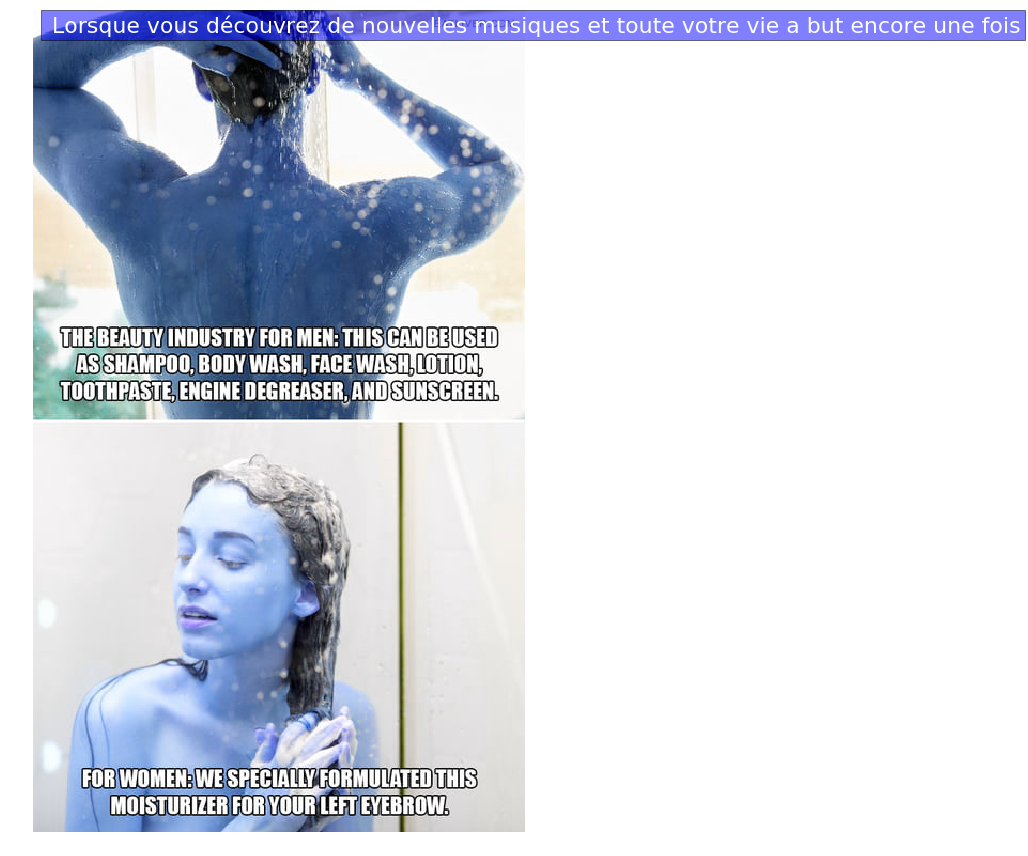

In [105]:
showResultOnImage( translated, image,"name" )